In [111]:
import pandas as pd
# Load the data
df = pd.read_csv('C:\\Users\\alokd\\Downloads\\Police Shootings Age Race.csv')


In [113]:
# Check the first few rows and basic info
print(df.head())
print(df.info())
print(df.describe())

   age race
0    8    B
1   13    B
2   14    B
3   15    B
4   15    B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     6054 non-null   int64 
 1   race    6054 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.7+ KB
None
               age
count  6054.000000
mean     37.791873
std      13.010320
min       2.000000
25%      28.000000
50%      36.000000
75%      46.000000
max      91.000000


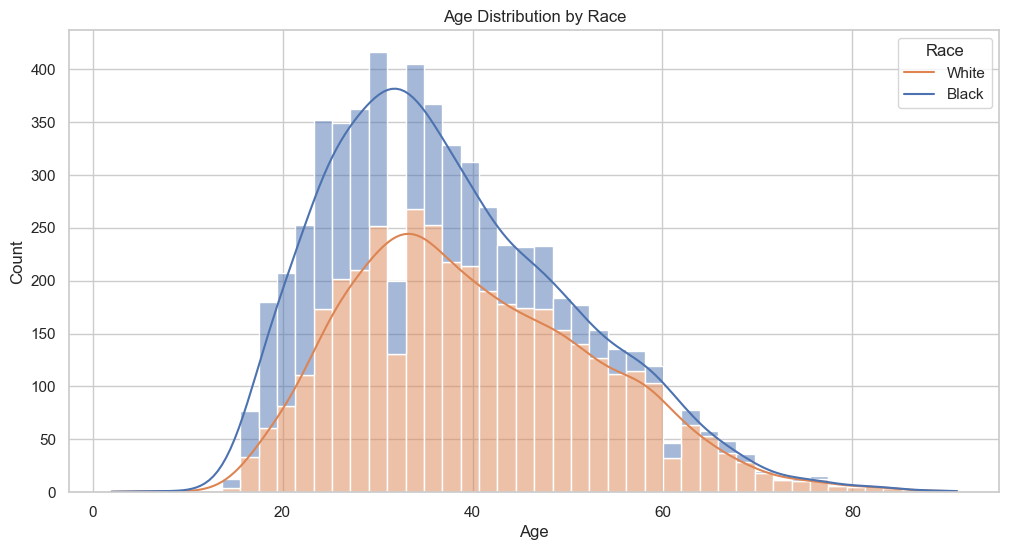

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df, x='age', hue='race', multiple='stack', kde=True)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Race', labels=['White', 'Black'])
plt.show()


In [141]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np


In [137]:
# Filter data for Black individuals
black_ages = df[df['race'] == 'B']['age']

# Mean
mean_black = black_ages.mean()

# Standard Deviation
stddev_black = black_ages.std()

# Variance
variance_black = black_ages.var()

# Skewness
skewness_black = skew(black_ages)

print(f"Black Ages - Mean: {mean_black}, Std Dev: {stddev_black}, Variance: {variance_black}, Skewness: {skewness_black}")


Black Ages - Mean: 33.04860442733398, Std Dev: 11.445882607843172, Variance: 131.00822867252683, Skewness: 0.9471771630506532


In [139]:
# Filter data for White individuals
white_ages = df[df['race'] == 'W']['age']

# Mean
mean_white = white_ages.mean()

# Standard Deviation
stddev_white = white_ages.std()

# Variance
variance_white = white_ages.var()

# Skewness
skewness_white = skew(white_ages)

print(f"White Ages - Mean: {mean_white}, Std Dev: {stddev_white}, Variance: {variance_white}, Skewness: {skewness_white}")


White Ages - Mean: 40.270875251509054, Std Dev: 13.091754256899629, Variance: 171.39402952304954, Skewness: 0.5420546838752048


In [143]:
# Filter the data for Black and White individuals
black_ages = df[df['race'] == 'B']['age']
white_ages = df[df['race'] == 'W']['age']

# Summary statistics for Black individuals
mean_black = black_ages.mean()
stddev_black = black_ages.std()
variance_black = black_ages.var()
skewness_black = skew(black_ages)

# Summary statistics for White individuals
mean_white = white_ages.mean()
stddev_white = white_ages.std()
variance_white = white_ages.var()
skewness_white = skew(white_ages)

# Create a summary dictionary for visualization
summary_data = {
    'Race': ['Black', 'White'],
    'Mean': [mean_black, mean_white],
    'Std Dev': [stddev_black, stddev_white],
    'Variance': [variance_black, variance_white],
    'Skewness': [skewness_black, skewness_white]
}

# Convert to DataFrame for easy plotting
summary_df = pd.DataFrame(summary_data)


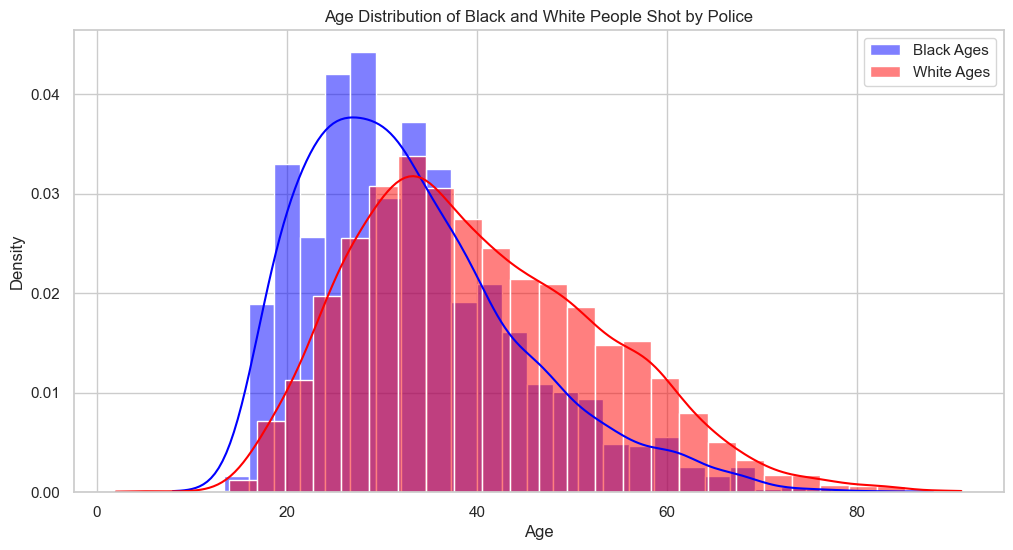

In [149]:
plt.figure(figsize=(12, 6))

# Plot histograms for both races
sns.histplot(black_ages, color='blue', label='Black Ages', kde=True, stat='density', bins=30)
sns.histplot(white_ages, color='red', label='White Ages', kde=True, stat='density', bins=30)

plt.title('Age Distribution of Black and White People Shot by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


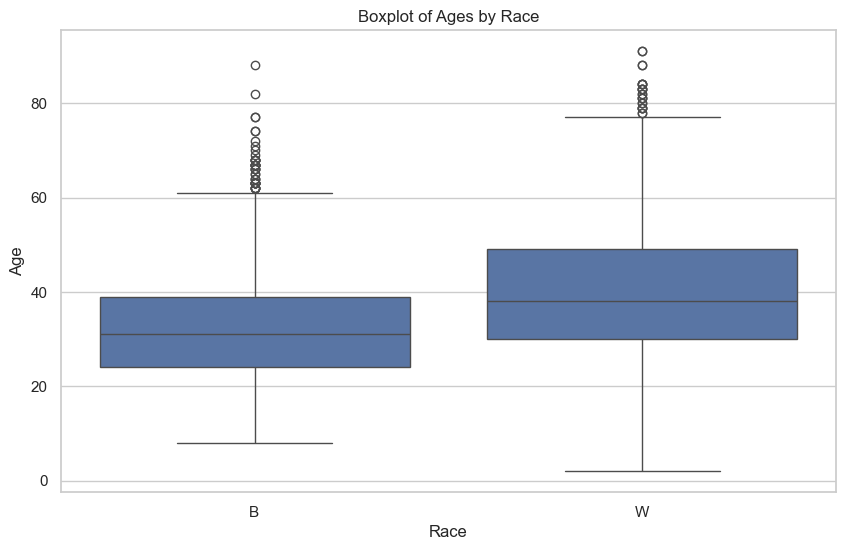

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='age', data=df)
plt.title('Boxplot of Ages by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()


[2.51509054e-04 5.03018109e-04 7.54527163e-04 ... 9.99496982e-01
 9.99748491e-01 1.00000000e+00]
[4.81231954e-04 9.62463908e-04 1.44369586e-03 ... 9.99037536e-01
 9.99518768e-01 1.00000000e+00]


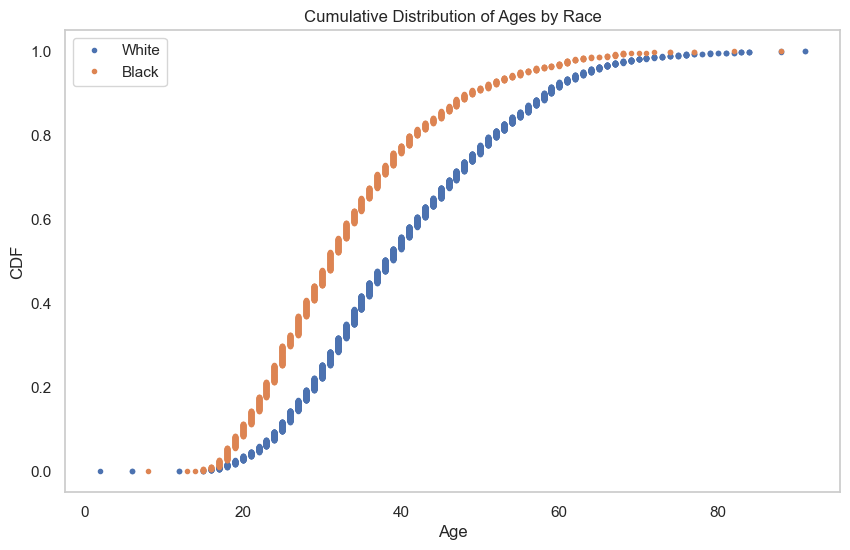

In [129]:

# Create CDF for both races
ages_white = df[df['race'] == 'W']['age']
ages_black = df[df['race'] == 'B']['age']

# Sort ages
ages_white_sorted = np.sort(ages_white)
ages_black_sorted = np.sort(ages_black)

# Calculate CDF
cdf_white = np.arange(1, len(ages_white_sorted) + 1) / len(ages_white_sorted)
cdf_black = np.arange(1, len(ages_black_sorted) + 1) / len(ages_black_sorted)

print(cdf_white)
print(cdf_black)

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(ages_white_sorted, cdf_white, label='White', marker='.', linestyle='none')
plt.plot(ages_black_sorted, cdf_black, label='Black', marker='.', linestyle='none')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.title('Cumulative Distribution of Ages by Race')
plt.legend()
plt.grid()
plt.show()


In [125]:
# Calculate means and standard deviations
mean_white = ages_white.mean()
mean_black = ages_black.mean()
std_white = ages_white.std(ddof=1)
std_black = ages_black.std(ddof=1)
n_white = len(ages_white)
n_black = len(ages_black)

# Calculate pooled standard deviation
pooled_std = np.sqrt(((n_white - 1) * std_white ** 2 + (n_black - 1) * std_black ** 2) / (n_white + n_black - 2))

# Cohen's d
cohen_d = (mean_black - mean_white) / pooled_std
print(f"Cohen's d: {cohen_d}")


Cohen's d: -0.5754223321506542


In [ ]:
A Cohen's d of approximately -0.58 indicates a moderate effect size, suggesting that the mean age of Black individuals shot by police is lower than that of White individuals by a noticeable amount.

### Interpretation:
- **Magnitude**: The negative sign indicates that the mean age of the group identified as Black is lower than that of the group identified as White. 
- **Effect Size Context**:
  - **Small (0.2)**: Little difference between groups.
  - **Moderate (0.5)**: Noticeable difference, which is the case here.
  - **Large (0.8 or higher)**: Substantial difference.
  
In practical terms, this means that on average, Black individuals shot by police tend to be younger than their White counterparts, which could raise questions about the circumstances surrounding these incidents, potential biases in policing, or differences in demographic factors influencing police encounters.

### Additional Considerations:
- **Contextual Factors**: While Cohen's d provides a statistical measure of effect size, it's important to consider socio-economic factors, geographical differences, historical contexts, and systemic issues that may contribute to these age disparities.
- **Further Analysis**: It may also be beneficial to explore other variables in your dataset (such as geographic location, crime rates, etc.) to provide a more comprehensive understanding of these results.

Let me know if you need further clarification or additional analysis!

In [127]:
from scipy import stats

# Check for normality
_, p_value_white = stats.shapiro(ages_white)
_, p_value_black = stats.shapiro(ages_black)

if p_value_white > 0.05 and p_value_black > 0.05:
    # Normal distribution, use t-test
    t_stat, p_value = stats.ttest_ind(ages_black, ages_white)
else:
    # Not normal, use Monte Carlo method
    # Resampling to estimate significance
    n_iterations = 10000
    combined = np.concatenate([ages_black, ages_white])
    observed_diff = mean_black - mean_white
    count = 0

    for _ in range(n_iterations):
        np.random.shuffle(combined)
        new_black = combined[:n_black]
        new_white = combined[n_black:]
        new_mean_diff = new_black.mean() - new_white.mean()
        if new_mean_diff >= observed_diff:
            count += 1

    p_value = count / n_iterations

print(f"P-value: {p_value}")
print(f"T-stat: {t_stat}")


P-value: 1.0
T-stat: 21.257464575572655


In [ ]:
A p-value of 1.0 in the context of your t-test suggests that there is no statistically significant difference between the mean ages of Black and White individuals shot by police. Here’s how to interpret these results:

Interpretation:
P-value of 1.0:
This indicates that the observed difference in mean ages is likely due to random chance, not a true effect. In hypothesis testing, a p-value of 0.05 or lower is typically considered significant, meaning you would reject the null hypothesis (which states that there is no difference between the groups). A p-value of 1.0 suggests that you would fail to reject the null hypothesis.
T-statistic of 21.26:
A t-statistic this high usually indicates a very strong difference between the two means; however, the p-value of 1.0 implies that this difference is not statistically significant in the context of your data. This discrepancy can occur if there are issues with the data, such as non-normal distribution, sample size, or the presence of outliers.
Possible Explanations:
Data Distribution: If the data for one or both groups is not normally distributed, the t-test may not be appropriate. Consider using non-parametric tests (like the Mann-Whitney U test) if normality assumptions are violated.
Sample Size: A very large sample size can lead to statistically significant results even for trivial differences. Conversely, a very small sample size may not capture the actual distribution, affecting the p-value.
Outliers: If there are outliers in your data, they can disproportionately affect the mean and standard deviation, leading to misleading results.